# Hardware Test for Deep Clustering Approach

Can we download the dataset? Can we do something with them?

Goals:
- Download the dataset
- Pick two dimensions and some kind of goal
- Perform simple clustering on them

To do this, it's gotta somewhat follow our plan for the real deal. Specifically, using Python and TensorFlow/Keras, as well as Splatter to simulate data.

# BUT FIRST! An investigation into R and Python

The following code attempts to use Splatter and R in order to generate a dataset, rather than download the direct dataset. This path proved... fraught with pitfalls.

Convert this cell to code and run the line below if you do not have rpy2 installed:

!pip install rpy2

In [ ]:
import os
# os.environ["R_HOME"] = "C:\Program Files\R\R-4.4.2"
os.environ["R_HOME"] = "C:/PROGRA~1/R/R-44~1.2"

gradwhag


In [2]:
import rpy2.robjects as ro
# from rpy2.robjects import r
from rpy2.robjects.packages import importr

splatter = importr("splatter")
# ro.r("library(splatter)")

In [3]:
# Load the R packages
%load_ext rpy2.ipython

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

c:\Users\Broondan\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


package 'ggplot2' successfully unpacked and MD5 sums checked


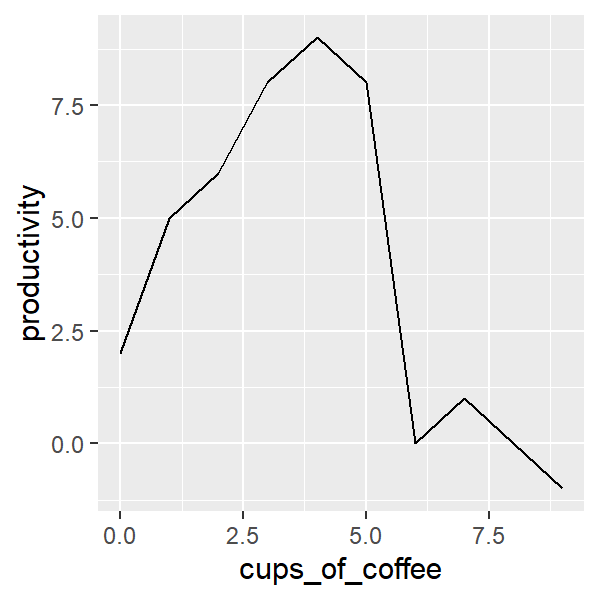

In [4]:
%%R -i df -w 3 -h 3 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

Quickstart guide code test:

https://www.bioconductor.org/packages/release/bioc/vignettes/splatter/inst/doc/splatter.html


In [5]:
%reload_ext rpy2.ipython

In [6]:
%%R
# Load package
suppressPackageStartupMessages({
    library(splatter)
    library(scater)
})

# Create mock data
set.seed(1)
sce <- mockSCE()

head(sce)

class: SingleCellExperiment 
dim: 6 200 
metadata(0):
assays(1): counts
rownames(6): Gene_0001 Gene_0002 ... Gene_0005 Gene_0006
rowData names(0):
colnames(200): Cell_001 Cell_002 ... Cell_199 Cell_200
colData names(3): Mutation_Status Cell_Cycle Treatment
reducedDimNames(0):
mainExpName: NULL
altExpNames(1): Spikes


In [7]:
%%R params <- splatEstimate(sce)
# ^ was to estimate parameters from mock data

# Simulate data using estimated parameters
sim <- splatSimulate(params)

# head(sim)

NOTE: Library sizes have been found to be normally distributed instead of log-normal. You may want to check this is correct.
Getting parameters...
Creating simulation object...
Simulating library sizes...
Simulating gene means...
Simulating BCV...
Simulating counts...
Simulating dropout (if needed)...
Sparsifying assays...
Automatically converting to sparse matrices, threshold = 0.95
Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix
Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix
Skipping 'BCV': estimated sparse size 1.5 * dense matrix
Skipping 'CellMeans': estimated sparse size 1.5 * dense matrix
Skipping 'TrueCounts': estimated sparse size 2.85 * dense matrix
Skipping 'counts': estimated sparse size 2.85 * dense matrix
Done!


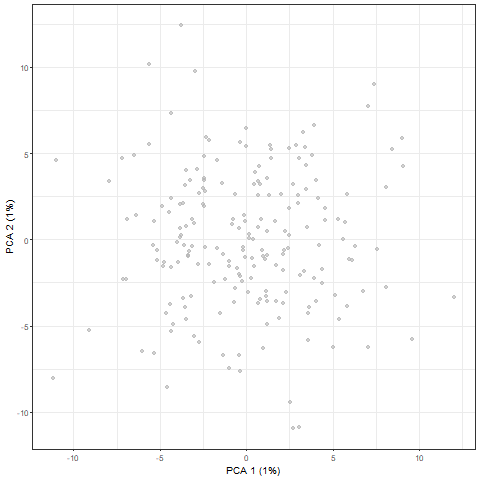

In [8]:
%%R sim <- logNormCounts(sim)
# Plot PCA
sim <- runPCA(sim)
plotPCA(sim)

In [9]:
# This badboy lets you see what vars you can grab
list(ro.globalenv.keys())

['.Random.seed', 'df', 'params', 'sce', 'sim']

Warning in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE,  :
  You're computing too large a percentage of total singular values, use a standard svd instead.


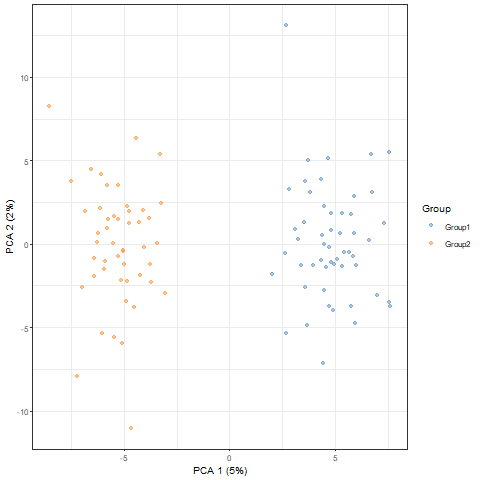

In [12]:
%%R
sim.groups <- splatSimulate(
    group.prob = c(0.5, 0.5),
    method = "groups",
    verbose = FALSE
)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)
plotPCA(sim.groups, colour_by = "Group")

In [13]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import pandas as pd

R_data = ro.globalenv['sim']
# print(R_data)

# df = pandas2ri.ri2py_dataframe(R_data)
# df = ro.conversion.rpy2py(R_data)
# print(df)
# df.head()
# df = pandas2ri.rpy2py(R_data)
# df.head()

# Back to testing our hardware capabilities!

In [14]:
import pandas as pd

url = "https://github.com/ttgump/scDeepCluster/blob/master/scRNA-seq%20data/mouse_bladder_cell.h5"

df = pd.read_csv(url)

df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 24
